In [532]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [533]:
all_df = pd.read_excel("data/car.xlsx")

In [534]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [535]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [536]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [537]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [538]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1728 train: 1373 test: 355


In [539]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [540]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [541]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [542]:
model = Sequential()

In [543]:
model.add(Dense(units=12*6,input_dim=6,
                kernel_initializer='uniform', 
                activation='relu'))

In [544]:
model.add(Dense(units=12*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [545]:
model.add(Dense(units=12*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [546]:
model.add(Dense(units=12*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [547]:
model.add(Dense(units=12*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [548]:
model.add(Dense(units=12, 
                kernel_initializer='uniform', 
                activation='relu'))

In [549]:
model.add(Dense(units=4, 
                kernel_initializer='uniform',
                activation='softmax'))

In [550]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 72)                504       
_________________________________________________________________
dense_134 (Dense)            (None, 60)                4380      
_________________________________________________________________
dense_135 (Dense)            (None, 48)                2928      
_________________________________________________________________
dense_136 (Dense)            (None, 36)                1764      
_________________________________________________________________
dense_137 (Dense)            (None, 24)                888       
_________________________________________________________________
dense_138 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_139 (Dense)            (None, 4)                 52        
Total para

In [551]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [552]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=35,verbose=2)

Train on 1235 samples, validate on 138 samples
Epoch 1/30
 - 3s - loss: 1.3587 - acc: 0.7206 - val_loss: 1.3185 - val_acc: 0.5725
Epoch 2/30
 - 0s - loss: 0.9608 - acc: 0.7206 - val_loss: 1.6997 - val_acc: 0.5725
Epoch 3/30
 - 0s - loss: 0.8291 - acc: 0.7206 - val_loss: 1.8726 - val_acc: 0.5725
Epoch 4/30
 - 0s - loss: 0.7949 - acc: 0.7206 - val_loss: 1.6386 - val_acc: 0.5725
Epoch 5/30
 - 0s - loss: 0.7441 - acc: 0.7206 - val_loss: 1.3613 - val_acc: 0.5725
Epoch 6/30
 - 0s - loss: 0.6470 - acc: 0.7206 - val_loss: 1.2255 - val_acc: 0.5725
Epoch 7/30
 - 0s - loss: 0.5510 - acc: 0.7206 - val_loss: 0.8608 - val_acc: 0.5725
Epoch 8/30
 - 0s - loss: 0.4413 - acc: 0.7206 - val_loss: 0.7072 - val_acc: 0.5725
Epoch 9/30
 - 0s - loss: 0.4051 - acc: 0.7352 - val_loss: 0.6636 - val_acc: 0.5797
Epoch 10/30
 - 0s - loss: 0.3773 - acc: 0.7781 - val_loss: 0.6628 - val_acc: 0.6087
Epoch 11/30
 - 0s - loss: 0.3609 - acc: 0.8073 - val_loss: 0.6612 - val_acc: 0.6377
Epoch 12/30
 - 0s - loss: 0.3318 - acc

In [553]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

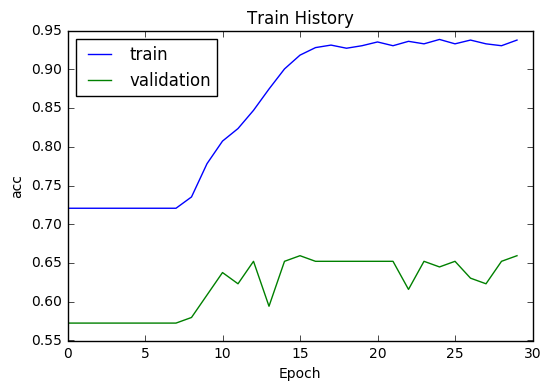

In [554]:
show_train_history(train_history,'acc','val_acc')

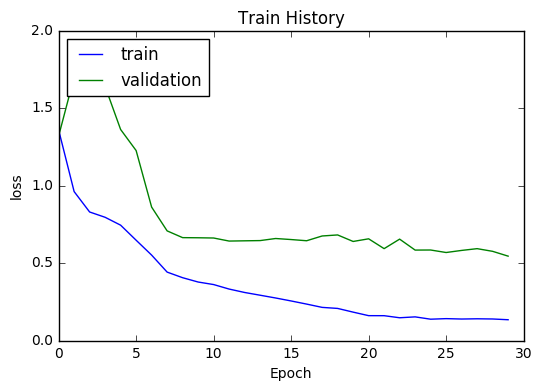

In [555]:
show_train_history(train_history,'loss','val_loss')

In [556]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

355/355 [==============================] - 0s 225us/step


In [557]:
scores[1]

0.8845070423374713